In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
import pandas as pd
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, r2_score
import numpy as np

In [19]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Grau da limitação de atividade habitual,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0


In [20]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [21]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

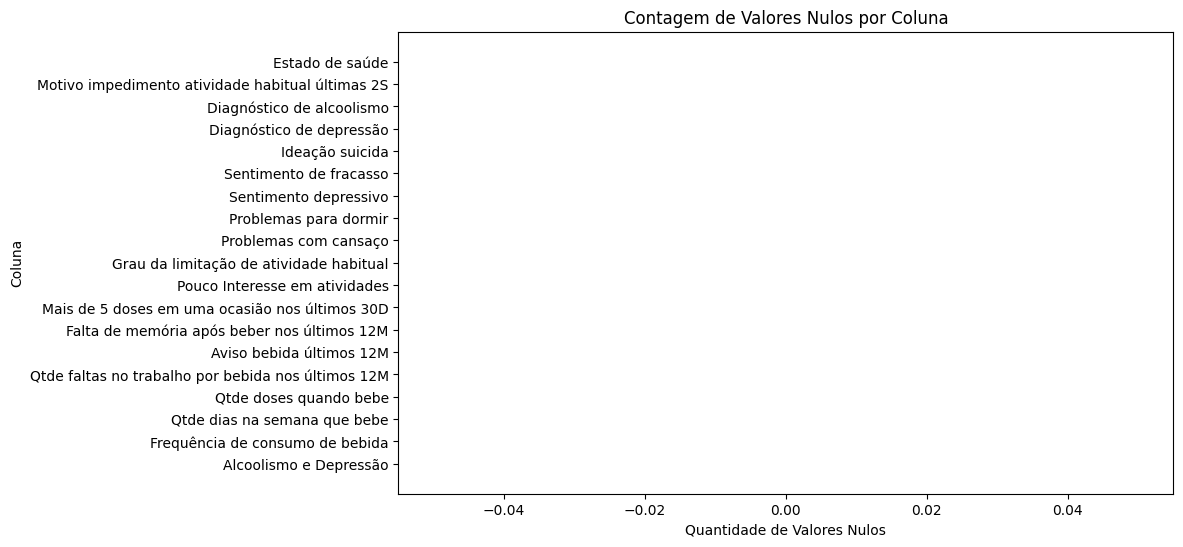

In [22]:
# Suponha que você já tenha executado df.isnull().sum()
null_counts = df.isnull().sum()

# Crie um DataFrame com as contagens de valores nulos
null_counts_df = pd.DataFrame({'Coluna': null_counts.index, 'Valores Nulos': null_counts.values})

# Ordene o DataFrame por contagem de valores nulos (opcional)
null_counts_df = null_counts_df.sort_values(by='Valores Nulos', ascending=False)

# Plote o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(null_counts_df['Coluna'], null_counts_df['Valores Nulos'], color='skyblue')
plt.xlabel('Quantidade de Valores Nulos')
plt.ylabel('Coluna')
plt.title('Contagem de Valores Nulos por Coluna')
plt.gca().invert_yaxis()  # Inverte a ordem das colunas para a mais alta no topo
plt.show()

In [23]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão", "Diagnóstico de alcoolismo"], axis=1)
Y = df["Alcoolismo e Depressão"]

print("X:", len(X), "Y:", len(Y))

X: 1614 Y: 1614


In [24]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [25]:
param_grid = {
    'max_depth': [5, 10, 20],
    'max_features': [5, 10, 20],
    'n_estimators': [20, 50]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring="neg_mean_squared_error")

grid_search.fit(X_train, Y_train)

# Pega os melhores parâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [26]:
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

Melhores hiperparâmetros encontrados: {'max_depth': 5, 'max_features': 20, 'n_estimators': 20}


In [27]:
y_pred_rf_regressor = best_model.predict(X_test)

In [28]:
mae = mean_absolute_error(Y_test, y_pred_rf_regressor)
mse = mean_squared_error(Y_test, y_pred_rf_regressor)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_rf_regressor)

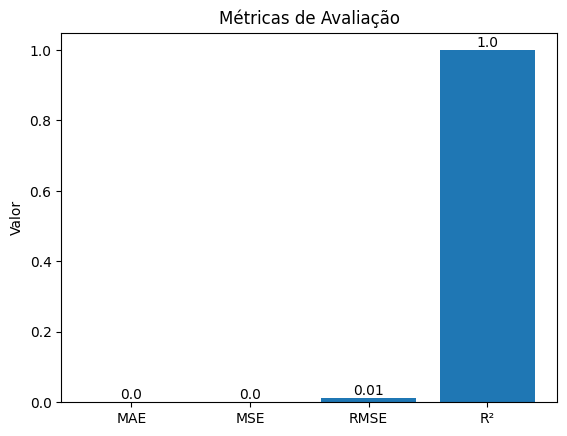

In [29]:
# Criar um gráfico de barras para as métricas
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²']
metrics_values = [mae, mse, rmse, r2]

plt.bar(metrics_names, metrics_values)
plt.ylabel('Valor')
plt.title('Métricas de Avaliação')

# Adicionar rótulos de dados para cada coluna
for i, v in enumerate(metrics_values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

In [30]:
feature_importances = best_model.feature_importances_
print("Importância das características:", feature_importances)

Importância das características: [0.         0.         0.92935337 0.         0.03217098 0.
 0.         0.         0.03847565 0.         0.         0.
 0.         0.         0.         0.        ]


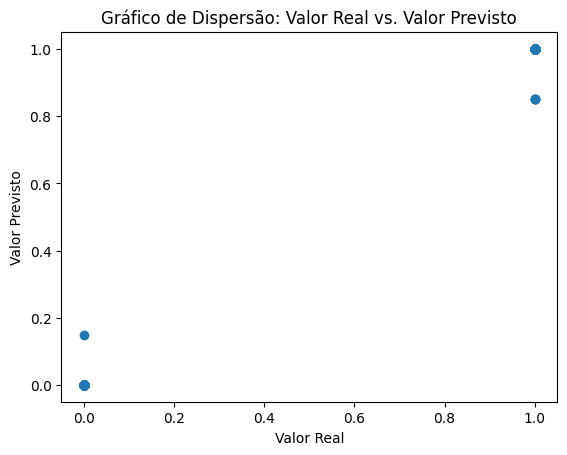

In [31]:
plt.scatter(Y_test, y_pred_rf_regressor)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Gráfico de Dispersão: Valor Real vs. Valor Previsto")
plt.show()

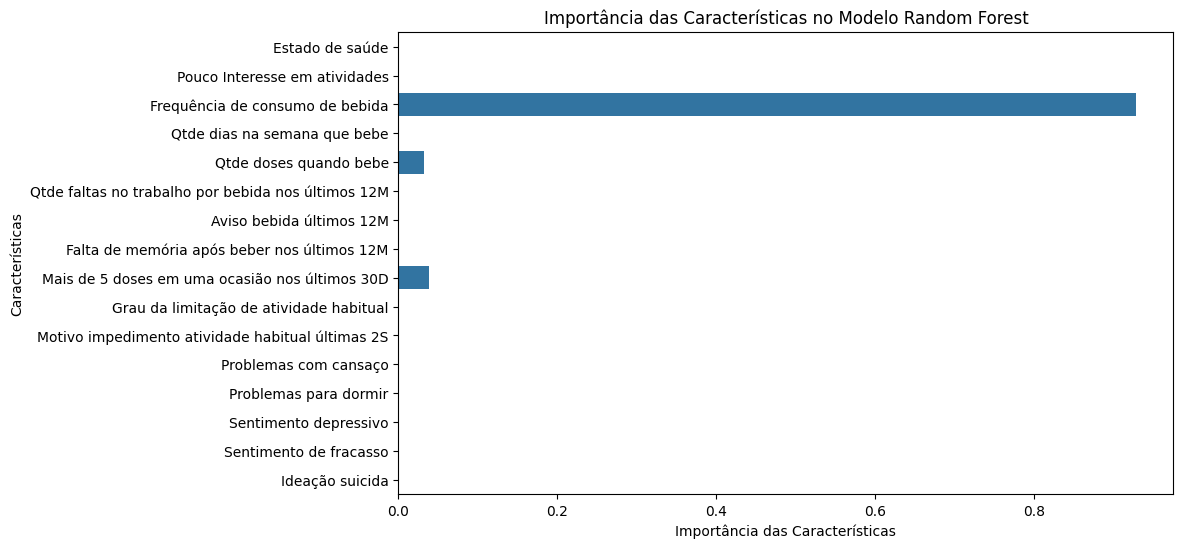

In [32]:
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Importância das Características")
plt.ylabel("Características")
plt.title("Importância das Características no Modelo Random Forest")
plt.show()

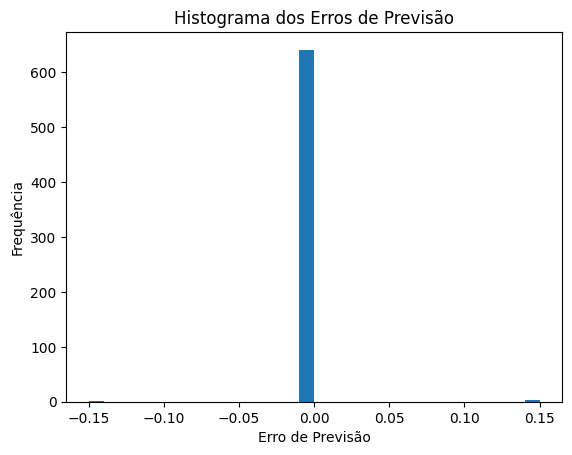

In [33]:
errors = Y_test - y_pred_rf_regressor
plt.hist(errors, bins=30)
plt.xlabel("Erro de Previsão")
plt.ylabel("Frequência")
plt.title("Histograma dos Erros de Previsão")
plt.show()

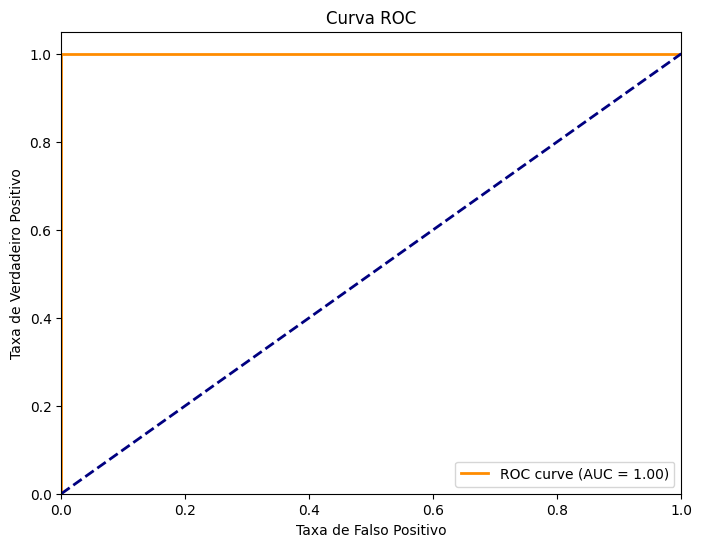

In [34]:
# Transforme as previsões em rótulos binários com base em um limite
threshold = 0.5  # Substitua pelo limite apropriado
y_pred_binary = (y_pred_rf_regressor >= threshold).astype(int)

# Calcule a Curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_binary)
roc_auc = roc_auc_score(Y_test, y_pred_binary)

# Plote a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
